In [2]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

LOAD DATA

In [3]:
emosi="C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT 5/Mulvar/UAS/Emosi/"
dir_list = os.listdir(emosi)
dir_list[0:5]

['marah_1.wav',
 'marah_10.wav',
 'marah_100.wav',
 'marah_11.wav',
 'marah_12.wav']

In [4]:
def create_dataset(data_dir):
    data = {'label': []}

    for filename in os.listdir(data_dir):
        if filename.endswith(".wav"):
            file_path = os.path.join(data_dir, filename)
            label = filename.split('_')[0]  # Ambil label dari nama file
            data['label'].append(label)

    return pd.DataFrame(data)

df = create_dataset(emosi)
print(df.head())

   label
0  marah
1  marah
2  marah
3  marah
4  marah


In [5]:
df.label.value_counts()

label
marah       100
sedih       100
senang      100
takut       100
terkejut    100
Name: count, dtype: int64

In [6]:
audio_data = []
labels = []
paths = []

for i in dir_list:
    audio_path = os.path.join(emosi, i)
    
    # Memuat file audio
    y, sr = librosa.load(audio_path, sr=None)
    
    # Menyimpan sinyal audio dan label
    audio_data.append(y)
    labels.append(i.split('_')[0])  # Mengambil label dari nama file
    paths.append(audio_path)

# Mengonversi ke DataFrame
audio_df = pd.DataFrame({'labels': labels, 'path': paths})

In [7]:
audio_df

,labels,path
0,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
1,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
2,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
3,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
4,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
...,...,...
495,terkejut,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
496,terkejut,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
497,terkejut,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...
498,terkejut,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...


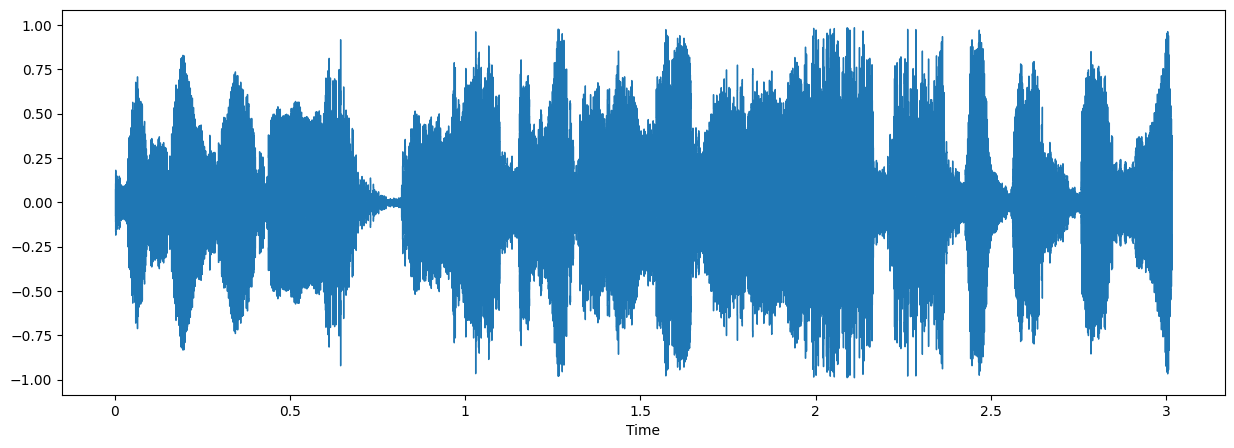

In [8]:
# Lets play a marah track
fname = emosi + 'marah_1.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

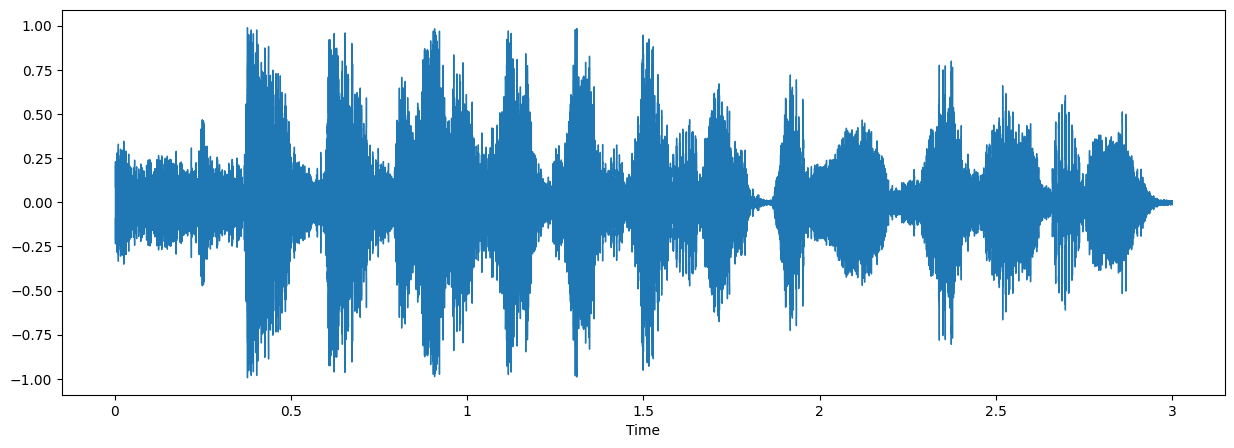

In [9]:
# Lets play a senang track
fname = emosi + 'senang_1.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

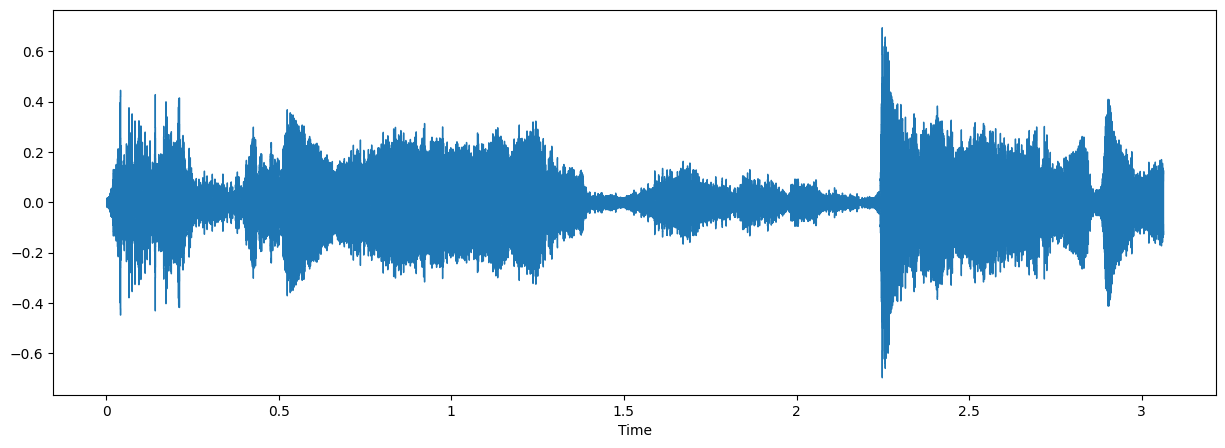

In [10]:
# Lets play a terkejut track
fname = emosi + 'terkejut_25.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

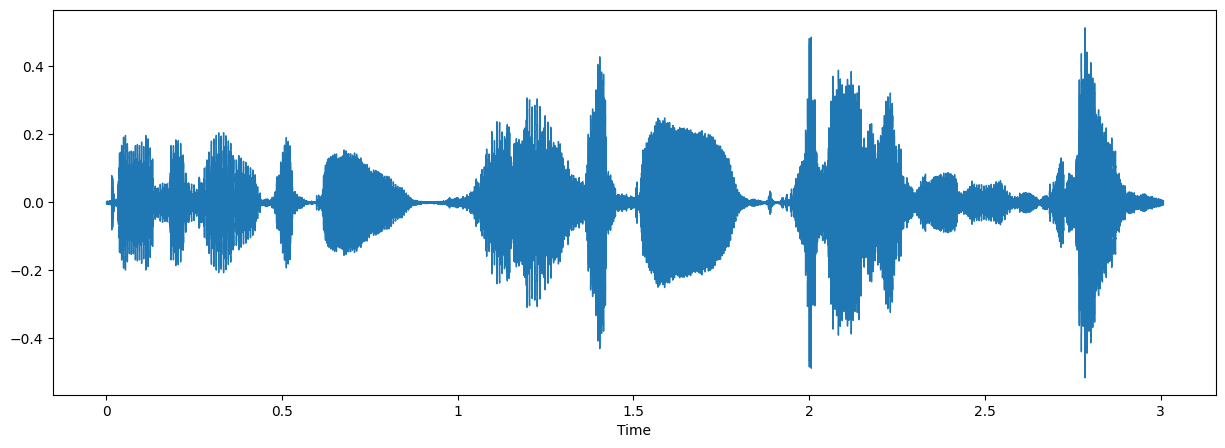

In [11]:
# Lets play a takut track
fname = emosi + 'takut_1.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

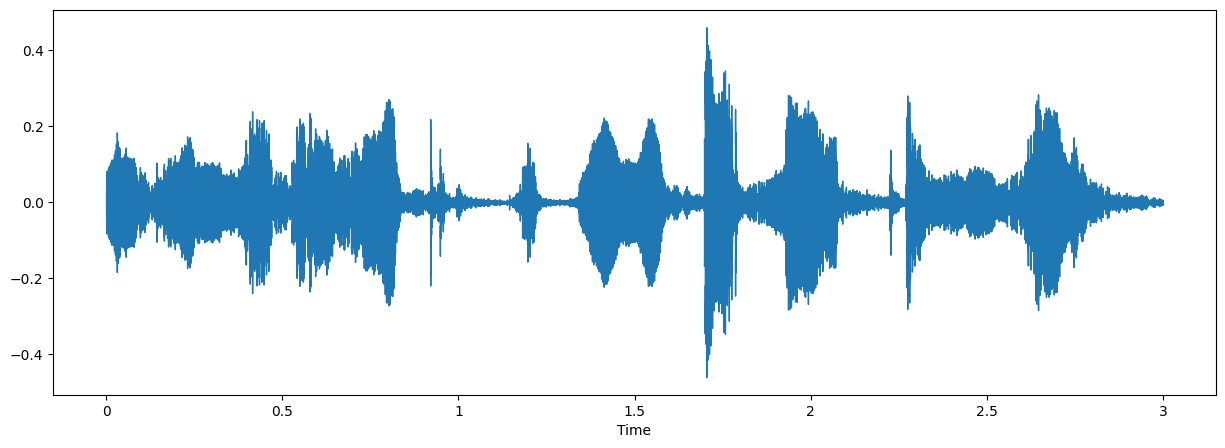

In [12]:
# Lets play a sedih track
fname = emosi + 'sedih_1.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

EKSTRAKSI FITUR (MFCC)

In [14]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

500


,feature
0,"[1.3970916, -2.4849906, -12.695919, -12.564398..."
1,"[-24.724468, -20.66577, -19.215237, -20.107937..."
2,"[3.2685382, 0.16698052, -8.047261, -6.154487, ..."
3,"[-13.268294, -17.966248, -25.093363, -23.71725..."
4,"[-10.454092, -14.403515, -22.747026, -24.76717..."


In [15]:
df = pd.concat([audio_df,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,1.397092,-2.484991,-12.695919,-12.564398,-14.948310,-17.093014,-16.932674,-16.361269,...,-22.987436,-23.131887,-23.105886,-23.547182,-24.495684,-24.739662,-26.055075,-22.477633,-12.148742,-5.807473
1,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-24.724468,-20.665770,-19.215237,-20.107937,-22.715771,-23.994192,-23.757475,-24.471165,...,-20.377218,-23.662935,-23.377096,-22.547380,-24.069996,-23.447533,-21.571157,-20.452665,-13.506197,-5.681911
2,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,3.268538,0.166981,-8.047261,-6.154487,-6.834195,-9.863043,-9.359626,-9.694529,...,-23.585499,-20.551291,-18.220098,-16.079353,-15.616413,-14.930695,-16.446926,-18.114031,-17.425993,-16.366085
3,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-13.268294,-17.966248,-25.093363,-23.717251,-24.071760,-22.635735,-21.356943,-20.725929,...,-2.323855,-5.993024,-11.704656,-14.892574,-15.528026,-18.962114,-15.258565,-6.743625,-3.477230,-1.753714
4,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-10.454092,-14.403515,-22.747026,-24.767172,-24.019499,-22.869852,-21.710379,-18.368391,...,-24.447540,-12.051749,-7.991503,-10.378058,-11.166993,-12.000900,-8.318426,-6.387629,-7.318801,-3.422004


In [16]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(500, 218)


,labels,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,1.397092,-2.484991,-12.695919,-12.564398,-14.948310,-17.093014,-16.932674,-16.361269,...,-22.987436,-23.131887,-23.105886,-23.547182,-24.495684,-24.739662,-26.055075,-22.477633,-12.148742,-5.807473
1,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-24.724468,-20.665770,-19.215237,-20.107937,-22.715771,-23.994192,-23.757475,-24.471165,...,-20.377218,-23.662935,-23.377096,-22.547380,-24.069996,-23.447533,-21.571157,-20.452665,-13.506197,-5.681911
2,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,3.268538,0.166981,-8.047261,-6.154487,-6.834195,-9.863043,-9.359626,-9.694529,...,-23.585499,-20.551291,-18.220098,-16.079353,-15.616413,-14.930695,-16.446926,-18.114031,-17.425993,-16.366085
3,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-13.268294,-17.966248,-25.093363,-23.717251,-24.071760,-22.635735,-21.356943,-20.725929,...,-2.323855,-5.993024,-11.704656,-14.892574,-15.528026,-18.962114,-15.258565,-6.743625,-3.477230,-1.753714
4,marah,C:/Users/Lenovo/OneDrive/Documents/Kuliah/SMT ...,-10.454092,-14.403515,-22.747026,-24.767172,-24.019499,-22.869852,-21.710379,-18.368391,...,-24.447540,-12.051749,-7.991503,-10.378058,-11.166993,-12.000900,-8.318426,-6.387629,-7.318801,-3.422004


SPLIT DATA

In [17]:
from sklearn.model_selection import train_test_split

# Assuming df contains your features and labels
X = df.drop(['path', 'labels'], axis=1)
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 216)
y_train shape: (400,)
X_test shape: (100, 216)
y_test shape: (100,)


In [18]:
# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42, shuffle=True)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (240, 216)
y_train shape: (240,)
X_val shape: (160, 216)
y_val shape: (160,)


MODEL

BASELINE

In [19]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Menggunakan LabelEncoder untuk mengonversi label kelas dari string ke integer
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Baseline Model
model = Sequential()
model.add(Dense(128, input_shape=(216,), activation='relu'))
model.add(Dense(5, activation='softmax'))  # Ganti 10 dengan jumlah kelas yang sesuai

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))


Epoch 1/10
8/8 [==============================] - 3s 257ms/step - loss: 16.2444 - accuracy: 0.2125 - val_loss: 7.7913 - val_accuracy: 0.2375
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 9.7886 - accuracy: 0.2167 - val_loss: 7.9929 - val_accuracy: 0.2375
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 9.3489 - accuracy: 0.2208 - val_loss: 7.3778 - val_accuracy: 0.1875
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 6.7878 - accuracy: 0.2292 - val_loss: 7.5180 - val_accuracy: 0.1750
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 6.1315 - accuracy: 0.2458 - val_loss: 6.3642 - val_accuracy: 0.1875
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 4.9329 - accuracy: 0.2792 - val_loss: 5.2614 - val_accuracy: 0.2188
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 4.0786 - accuracy: 0.3167 - val_loss: 5.3080 - val_accuracy: 0.1875
Epoch 8/10
8/8 [=========

CNN

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Using LabelEncoder to convert class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert the integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Reshape input data to match the expected input shape of the model
X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1)
X_val_reshaped = X_val.values.reshape(-1, X_val.shape[1], 1)
X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val_one_hot))


Epoch 1/10
8/8 [==============================] - 2s 71ms/step - loss: 4.0825 - accuracy: 0.1833 - val_loss: 2.3304 - val_accuracy: 0.1813
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 1.7331 - accuracy: 0.2583 - val_loss: 1.7541 - val_accuracy: 0.2313
Epoch 3/10
8/8 [==============================] - 0s 24ms/step - loss: 1.4823 - accuracy: 0.3625 - val_loss: 1.6601 - val_accuracy: 0.2375
Epoch 4/10
8/8 [==============================] - 0s 24ms/step - loss: 1.3852 - accuracy: 0.4167 - val_loss: 1.6105 - val_accuracy: 0.2500
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 1.3008 - accuracy: 0.4625 - val_loss: 1.6317 - val_accuracy: 0.2313
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 1.2120 - accuracy: 0.5333 - val_loss: 1.7012 - val_accuracy: 0.2562
Epoch 7/10
8/8 [==============================] - 0s 29ms/step - loss: 1.1403 - accuracy: 0.5417 - val_loss: 1.7417 - val_accuracy: 0.2750
Epoch 8/10
8/8 [===========

RNN

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.utils import to_categorical

# Reshape input data to match the expected input shape of the model
X_train_reshaped = X_train.values.reshape(-1, X_train.shape[1], 1)
X_val_reshaped = X_val.values.reshape(-1, X_val.shape[1], 1)
X_test_reshaped = X_test.values.reshape(-1, X_test.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val_one_hot))

Epoch 1/10
8/8 [==============================] - 3s 99ms/step - loss: 2.6102 - accuracy: 0.1708 - val_loss: 2.1309 - val_accuracy: 0.1688
Epoch 2/10
8/8 [==============================] - 0s 48ms/step - loss: 1.8581 - accuracy: 0.1875 - val_loss: 1.6183 - val_accuracy: 0.2250
Epoch 3/10
8/8 [==============================] - 0s 44ms/step - loss: 1.6359 - accuracy: 0.1875 - val_loss: 1.6401 - val_accuracy: 0.1875
Epoch 4/10
8/8 [==============================] - 0s 44ms/step - loss: 1.5788 - accuracy: 0.2125 - val_loss: 1.6053 - val_accuracy: 0.1813
Epoch 5/10
8/8 [==============================] - 0s 48ms/step - loss: 1.5593 - accuracy: 0.2333 - val_loss: 1.5875 - val_accuracy: 0.2375
Epoch 6/10
8/8 [==============================] - 0s 47ms/step - loss: 1.5635 - accuracy: 0.2250 - val_loss: 1.6937 - val_accuracy: 0.1625
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 1.5681 - accuracy: 0.2417 - val_loss: 1.5765 - val_accuracy: 0.2250
Epoch 8/10
8/8 [===========

VGG16

In [22]:
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import cv2

In [23]:
# Fungsi untuk menghasilkan spektrogram dari file audio
def create_spectrogram(file_path, max_length=128):
    y, sr = librosa.load(file_path, sr=None, duration=5)  # Menggunakan 5 detik pertama
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # Menyesuaikan atau memotong spektrogram jika panjangnya melebihi max_length
    if spec.shape[1] > max_length:
        spec = spec[:, :max_length]
    else:
        spec = np.pad(spec, ((0, 0), (0, max_length - spec.shape[1])), mode='constant', constant_values=-80.0)
    
    return librosa.power_to_db(spec, ref=np.max)

In [27]:
file_paths = audio_df['path']
labels = audio_df['labels']

X = []
for path in file_paths:
    spec = create_spectrogram(path)
    
    # Mengonversi spektrogram menjadi gambar grayscale dengan tiga saluran
    spec_rgb = cv2.cvtColor(spec, cv2.COLOR_GRAY2RGB)
    
    X.append(spec_rgb)

X = np.array(X)
y = np.array(labels)

# Melakukan encoding label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Membuat model VGG16 sebagai base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(X.shape[1], X.shape[2], 3))

# Menggunakan model VGG16 sebagai base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Membekukan lapisan-lapisan VGG16 agar tidak dilatih kembali
for layer in base_model.layers:
    layer.trainable = False

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Evaluasi model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy}")

Epoch 1/10
13/13 [==============================] - 22s 2s/step - loss: 5.7915 - accuracy: 0.4050 - val_loss: 3.4121 - val_accuracy: 0.4000
Epoch 2/10
13/13 [==============================] - 20s 2s/step - loss: 1.5549 - accuracy: 0.6325 - val_loss: 1.4226 - val_accuracy: 0.4900
Epoch 3/10
13/13 [==============================] - 20s 2s/step - loss: 0.6412 - accuracy: 0.7575 - val_loss: 1.0661 - val_accuracy: 0.5900
Epoch 4/10
13/13 [==============================] - 20s 2s/step - loss: 0.5210 - accuracy: 0.8075 - val_loss: 1.0029 - val_accuracy: 0.6000
Epoch 5/10
13/13 [==============================] - 20s 2s/step - loss: 0.4054 - accuracy: 0.8625 - val_loss: 1.1000 - val_accuracy: 0.6000
Epoch 6/10
13/13 [==============================] - 20s 2s/step - loss: 0.2731 - accuracy: 0.9025 - val_loss: 1.1311 - val_accuracy: 0.6500
Epoch 7/10
13/13 [==============================] - 20s 2s/step - loss: 0.2172 - accuracy: 0.9200 - val_loss: 1.2829 - val_accuracy: 0.6000
Epoch 8/10
13/13 [==

In [28]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan kelas sebenarnya dari one-hot encoded labels
y_true_classes = np.argmax(y_test, axis=1)

# Membalikkan proses encoding label
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_true_classes)

# Menampilkan hasil klasifikasi
print("Hasil Klasifikasi:")
for i in range(len(y_true_labels)):
    print(f"Data ke-{i+1}: Prediksi={y_pred_labels[i]}, Sebenarnya={y_true_labels[i]}")

# Menampilkan metrik evaluasi tambahan jika diperlukan
from sklearn.metrics import classification_report, confusion_matrix

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

4/4 [==============================] - 5s 1s/step
Hasil Klasifikasi:
Data ke-1: Prediksi=terkejut, Sebenarnya=takut
Data ke-2: Prediksi=marah, Sebenarnya=marah
Data ke-3: Prediksi=takut, Sebenarnya=takut
Data ke-4: Prediksi=terkejut, Sebenarnya=sedih
Data ke-5: Prediksi=takut, Sebenarnya=sedih
Data ke-6: Prediksi=takut, Sebenarnya=takut
Data ke-7: Prediksi=takut, Sebenarnya=takut
Data ke-8: Prediksi=sedih, Sebenarnya=sedih
Data ke-9: Prediksi=senang, Sebenarnya=marah
Data ke-10: Prediksi=terkejut, Sebenarnya=terkejut
Data ke-11: Prediksi=marah, Sebenarnya=marah
Data ke-12: Prediksi=sedih, Sebenarnya=sedih
Data ke-13: Prediksi=takut, Sebenarnya=terkejut
Data ke-14: Prediksi=marah, Sebenarnya=marah
Data ke-15: Prediksi=sedih, Sebenarnya=takut
Data ke-16: Prediksi=takut, Sebenarnya=takut
Data ke-17: Prediksi=terkejut, Sebenarnya=terkejut
Data ke-18: Prediksi=marah, Sebenarnya=marah
Data ke-19: Prediksi=takut, Sebenarnya=takut
Data ke-20: Prediksi=terkejut, Sebenarnya=terkejut
Data ke-21: 

Perbandingan Akurasi Model

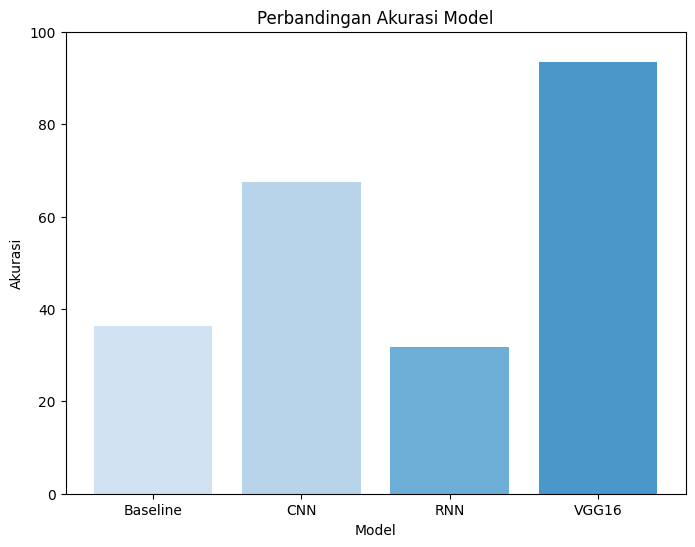

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Accuracies obtained from model evaluation
baseline_accuracy = 36.25
cnn_accuracy = 67.5  # Replace with the actual CNN accuracy
rnn_accuracy = 31.67  # Replace with the actual RNN accuracy
vgg16_accuracy = 93.5  # Replace with the actual VGG16 accuracy

# List of accuracies and their respective models
accuracies = [baseline_accuracy, cnn_accuracy, rnn_accuracy, vgg16_accuracy]
models = ['Baseline','CNN', 'RNN', 'VGG16']

# Define colors using a gradient colormap (Blues) and reverse the order
colors = cm.Blues_r([0.8, 0.7, 0.5, 0.4])  # Adjust color intensities as needed

# Create bar plot with gradient colors
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 100)  # Set the y-axis limits between 0 and 100 for accuracy percentage

# Show the plot
plt.show()